In [1]:
# Code used for Fractional Score Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r mg


In [2]:
# Defining cg and mg to avoid dozens of 'variable is not defined' warnings
cg = cg
mg = mg


In [3]:
cg.head()

,game_order,event,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,datetime,variant,magnus_result
0,105,Lichess Titled Arena,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14 21:00:02,Standard,lost
1,104,Lichess Titled Arena,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14 21:01:10,Standard,lost
2,103,Lichess Titled Arena,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14 21:04:13,Standard,lost
3,102,Lichess Titled Arena,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14 21:06:30,Standard,lost
4,101,Lichess Titled Arena,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14 21:07:57,Standard,lost


In [5]:
# Converts a number of wins, losses, and ties to a fractional score (fscore)
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


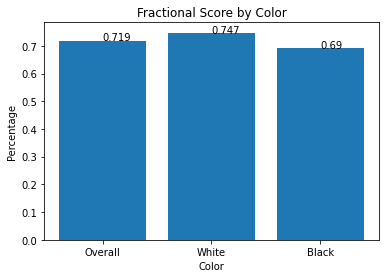

In [93]:
# Significant 5% difference between black and white
x = ['Overall','White','Black']
y = [fscore(vco(cg)),fscore(vc(cg,cg.white=='Magnus Carlsen')),fscore(vc(cg,cg.black=='Magnus Carlsen'))]
plt.bar(x,y)
plt.title('Fractional Score by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

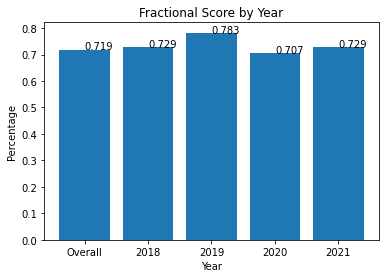

In [6]:
x = ['Overall','2018','2019','2020','2021']
y = [fscore(vco(cg)),fscore(vc(cg,cg.datetime.str[0:4]=='2018')),fscore(vc(cg,cg.datetime.str[0:4]=='2019')),fscore(vc(cg,cg.datetime.str[0:4]=='2020')),fscore(vc(cg,cg.datetime.str[0:4]=='2021'))]
plt.bar(x,y)
plt.title('Fractional Score by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

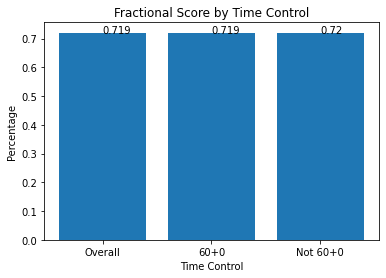

In [95]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, will change or remove
x = ['Overall','60+0','Not 60+0']
y = [fscore(vco(cg)),fscore(vc(cg,cg.time_control=='60+0')),fscore(vc(cg,cg.time_control!='60+0'))]
plt.bar(x,y)
plt.title('Fractional Score by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

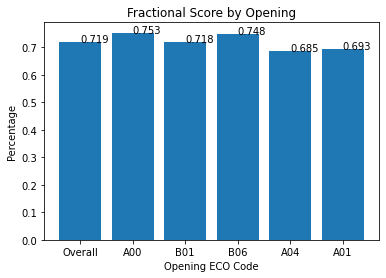

In [96]:
# I think first move might be better but this is a test
x = ['Overall','A00','B01','B06','A04','A01']
y = [fscore(vco(cg)),fscore(cg[cg.eco=='A00'].magnus_result.value_counts()),fscore(cg[cg.eco=='B01'].magnus_result.value_counts()),fscore(cg[cg.eco=='B06'].magnus_result.value_counts()),fscore(cg[cg.eco=='A04'].magnus_result.value_counts()),fscore(cg[cg.eco=='A01'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Fractional Score by Opening')
plt.xlabel('Opening ECO Code')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

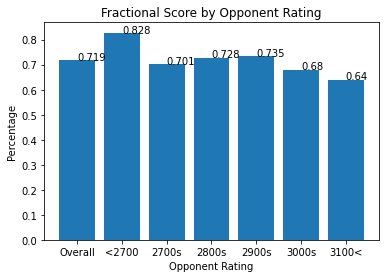

In [97]:
# Each bin has 1600+ games so I'm using these bins.
# x = ['<2700','2700-2800','2800-2900','2900-3000','3000-3100','3100<']
# y = [2141, 1612, 2202, 2488, 3201, 1798]

x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
plt.bar(x,y)
plt.title('Fractional Score by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()